# PROYECTO FINAL

Importamos las librerías y le cambiamos el encabezado para eliminar los espacios con los que viene el .csv en los títulos de las columnas.

In [1]:
import pandas as panda
import matplotlib.pyplot as pyplt
import seaborn as sns
from seaborn import pairplot

URL_DESCARGA = "/home/carlos/Proyectos/Python/ProyectoFinal/ProyectoBigData/datosContaminacionMadrid/madrid-air-quality.csv"
dfContaminacion = panda.read_csv(URL_DESCARGA)
columnNames = ['date', 'pm25', 'pm10','o3','no2','so2','co']
dfContaminacion.columns = columnNames

dfContaminacion ['date'] = panda.to_datetime(dfContaminacion['date'], format='%Y-%m-%d', errors='coerce')
dfContaminacion ['pm25'] = panda.to_numeric(dfContaminacion['pm25'], errors='coerce')
dfContaminacion ['pm10'] = panda.to_numeric(dfContaminacion['pm10'], errors='coerce')
dfContaminacion ['o3'] = panda.to_numeric(dfContaminacion['o3'], errors='coerce')
dfContaminacion ['no2'] = panda.to_numeric(dfContaminacion['no2'], errors='coerce')
dfContaminacion ['so2'] = panda.to_numeric(dfContaminacion['so2'], errors='coerce')
dfContaminacion ['co'] = panda.to_numeric(dfContaminacion['co'], errors='coerce')

Examinamos nuestros datos

In [2]:
print(dfContaminacion)

           date  pm25  pm10    o3   no2   so2  co
0    2020-12-01  47.0  14.0  27.0  25.0   1.0 NaN
1    2020-12-02  40.0  19.0  25.0  27.0   1.0 NaN
2    2020-12-03  47.0  12.0  27.0  19.0   1.0 NaN
3    2020-12-04  33.0   8.0  26.0  14.0   1.0 NaN
4    2020-12-05  24.0   9.0  27.0  12.0   1.0 NaN
...         ...   ...   ...   ...   ...   ...  ..
2419 2014-12-31   NaN  47.0  10.0  64.0  10.0 NaN
2420 2014-10-11   NaN  11.0  32.0  11.0   1.0 NaN
2421 2013-12-31   NaN  13.0  20.0  18.0   2.0 NaN
2422 2014-01-26   NaN  13.0  32.0  20.0   2.0 NaN
2423 2014-02-08   NaN  15.0  24.0  20.0   2.0 NaN

[2424 rows x 7 columns]


In [3]:
print(dfContaminacion.describe())
print(dfContaminacion.dtypes)

              pm25         pm10           o3          no2          so2   co
count  2407.000000  2408.000000  2406.000000  2407.000000  2378.000000  0.0
mean     54.155796    24.446844    33.087697    25.299543     3.511775  NaN
std      18.878451    11.627818    15.297391    10.369945     2.002120  NaN
min      14.000000     5.000000     1.000000     2.000000     1.000000  NaN
25%      40.000000    16.000000    24.000000    18.000000     2.000000  NaN
50%      53.000000    23.000000    33.000000    24.000000     3.000000  NaN
75%      65.000000    31.000000    42.000000    31.000000     4.000000  NaN
max     159.000000   160.000000   249.000000    74.000000    15.000000  NaN
date    datetime64[ns]
pm25           float64
pm10           float64
o3             float64
no2            float64
so2            float64
co             float64
dtype: object


##### Observamos el numero de valores por columna que nos vienen nulos.

In [4]:
dfContaminacion.isnull().sum()

date       0
pm25      17
pm10      16
o3        18
no2       17
so2       46
co      2424
dtype: int64

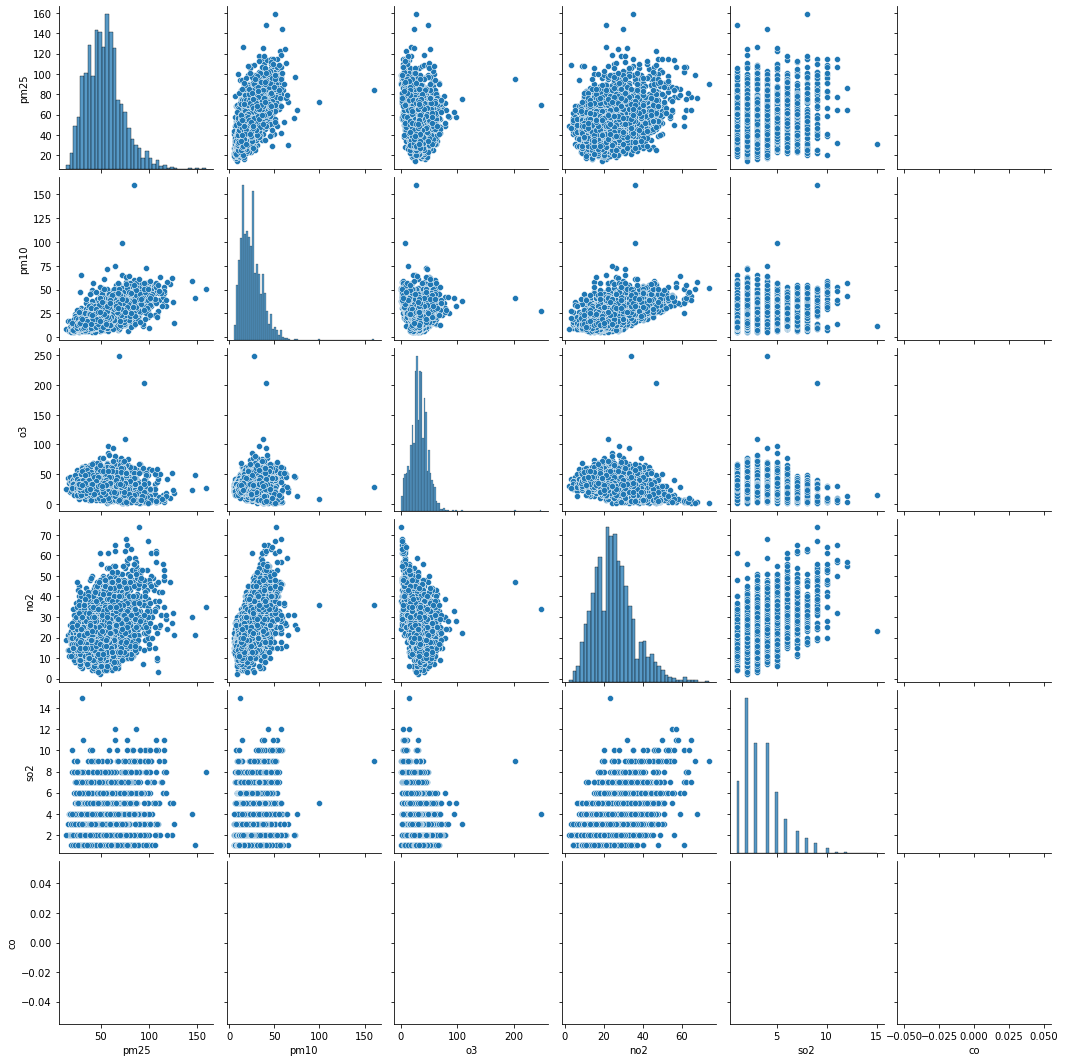

In [5]:
sns.pairplot(dfContaminacion)

In [6]:
dfContaminacion['date'].describe()

<ipython-input-6-ab3f2cbb864c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfContaminacion['date'].describe()


count                    2424
unique                   2424
top       2019-07-06 00:00:00
freq                        1
first     2013-12-31 00:00:00
last      2020-12-14 00:00:00
Name: date, dtype: object

In [7]:
# Filtro por fecha
dfContaminacion2018 = dfContaminacion[(dfContaminacion['date'] > '2018-01-01') & (dfContaminacion['date'] < '2019-01-01')]
print(dfContaminacion2018.shape)
dfContaminacion2018.head()


(281, 7)


,date,pm25,pm10,o3,no2,so2,co
712,2018-10-01,47.0,25.0,30.0,29.0,2.0,NaN
713,2018-10-02,40.0,32.0,28.0,34.0,2.0,NaN
714,2018-10-03,44.0,35.0,33.0,41.0,2.0,NaN
715,2018-10-04,52.0,39.0,41.0,45.0,3.0,NaN
716,2018-10-05,67.0,39.0,45.0,40.0,2.0,NaN


Volvemos a pintar los valores, pero esta vez del año 2018

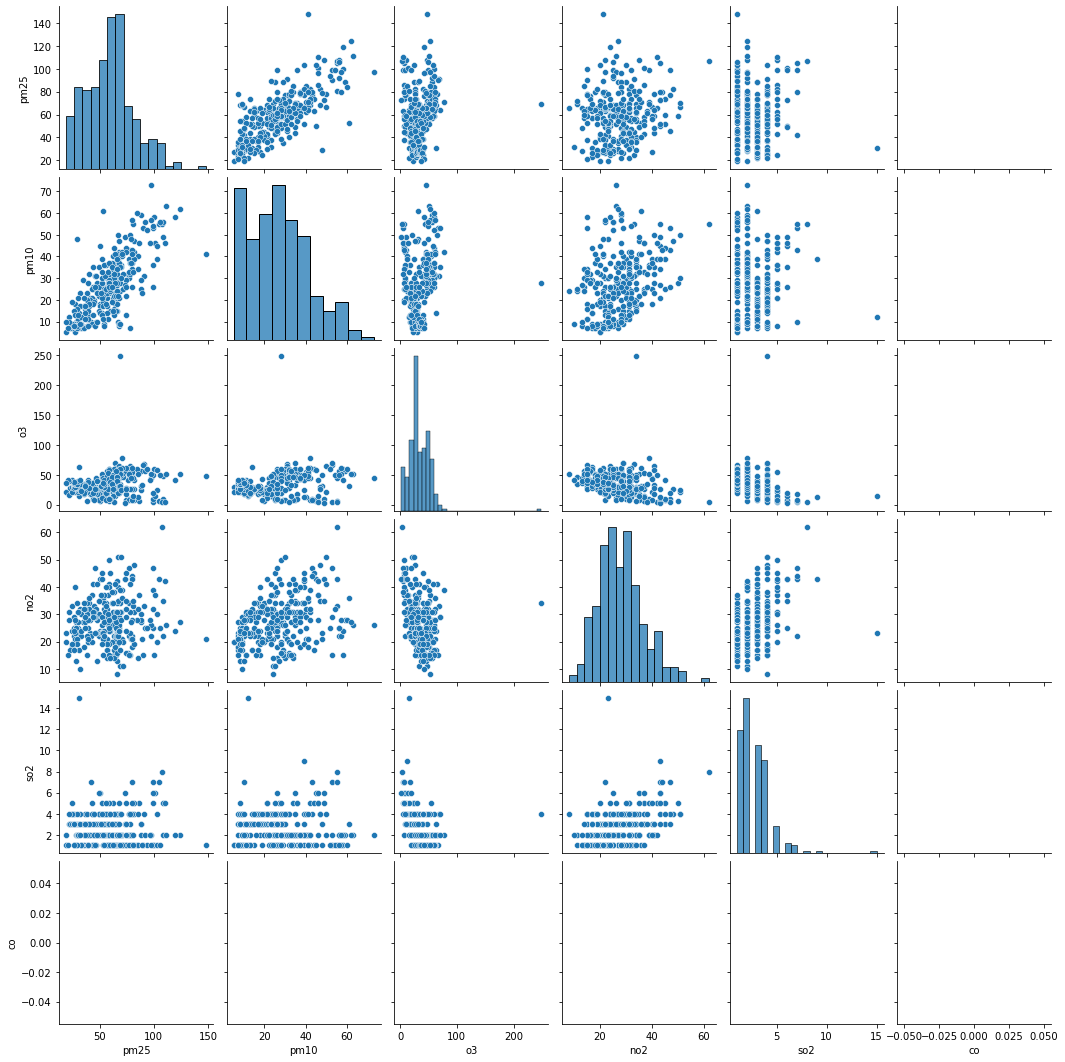

In [8]:
sns.pairplot(dfContaminacion2018)

In [9]:
#Miramos la correlación entre datos.
dfContaminacion2018.corr()**2

,pm25,pm10,o3,no2,so2,co
pm25,1.000000,0.564411,0.031890,0.019735,0.002255,NaN
pm10,0.564411,1.000000,0.053611,0.108528,0.001720,NaN
o3,0.031890,0.053611,1.000000,0.068524,0.167821,NaN
no2,0.019735,0.108528,0.068524,1.000000,0.137689,NaN
so2,0.002255,0.001720,0.167821,0.137689,1.000000,NaN
co,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(dfContaminacion2018.corr(method='pearson'))

          pm25      pm10        o3       no2       so2  co
pm25  1.000000  0.751273  0.178577  0.140483  0.047487 NaN
pm10  0.751273  1.000000  0.231540  0.329435  0.041474 NaN
o3    0.178577  0.231540  1.000000 -0.261770 -0.409659 NaN
no2   0.140483  0.329435 -0.261770  1.000000  0.371064 NaN
so2   0.047487  0.041474 -0.409659  0.371064  1.000000 NaN
co         NaN       NaN       NaN       NaN       NaN NaN


/home/carlos/anaconda3/envs/ITT_BigData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


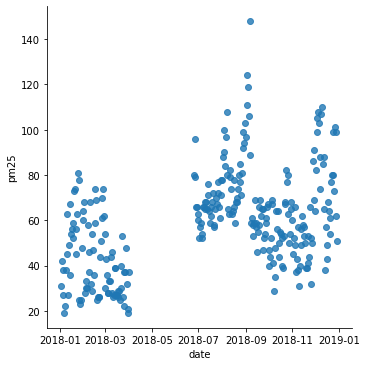

In [11]:
from seaborn import lmplot

#lmplot(x='date', y='pm25', data=dfContaminacion2018)
lmplot('date', 'pm25', data=dfContaminacion2018, fit_reg=False)

Eliminamos los valores nulos sustituyéndolos por el valor correspondiente

In [12]:
from sklearn.impute import SimpleImputer
import numpy as numpy


imputerNanValuesToMean = SimpleImputer(missing_values=numpy.nan, strategy='mean')
imputerNanValuesToMedian = SimpleImputer(missing_values=numpy.nan, strategy='median')
imputerNanValuesToMode = SimpleImputer(strategy="most_frequent")

In [13]:

imputerNanValuesToMean.fit_transform(dfContaminacion2018['pm25'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2018['pm10'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2018['o3'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2018['no2'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2018['so2'].values.reshape(-1,1))

array([[ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 3.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 3.        ],
       [ 3.        ],
       [ 2.        ],
       [ 2.        ],
       [ 3.        ],
       [ 2.        ],
       [ 3.        ],
       [ 4.        ],
       [ 4.        ],
       [ 3.        ],
       [ 3.        ],
       [ 3.        ],
       [ 3.        ],
       [ 3.        ],
       [ 4.        ],
       [ 4.        ],
       [ 4.        ],
       [ 4.        ],
       [ 4.        ],
       [ 4.        ],
       [ 4.        ],
       [ 3.        ],
       [ 4.        ],
       [ 4.        ],
       [ 4.        ],
       [ 4.        ],
       [ 5.        ],
       [ 4.        ],
       [ 4.        ],
       [ 4.        ],
       [ 5.        ],
       [ 4.        ],
       [ 3.        ],
       [ 3.        ],
       [ 3.        ],
       [ 4.        ],
       [ 3.        ],
       [ 3.        ],
       [ 3

In [14]:
print("dfContaminacion2018",dfContaminacion2018.shape)

dfContaminacion2018 (281, 7)


Comprobamos la cantidad de valores nulos que tenemos


In [15]:
print("dfContaminacion2018",dfContaminacion2018.isnull().sum())


dfContaminacion2018 date      0
pm25      2
pm10      2
o3        2
no2       2
so2       2
co      281
dtype: int64


Miramos la distribución de nuestros datos


/home/carlos/anaconda3/envs/ITT_BigData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pm25'>

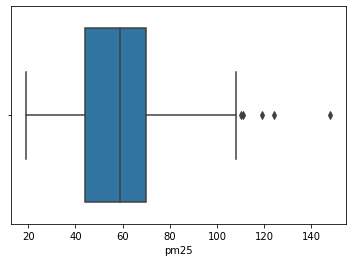

In [16]:
from seaborn import boxplot
boxplot(dfContaminacion2018.pm25)

In [17]:
q1=dfContaminacion2018['pm25'].quantile(0.25)
q2=dfContaminacion2018['pm25'].quantile(0.5)
IQ = q2-q1
#limiteSuperior = dfContaminacion2018['pm25'].quantile(0.75)
limiteSuperior = q1+1.5*IQ
limiteInferior = q2-1.5*IQ

print ("limite Superior",limiteSuperior)
print ("limite inferior",limiteInferior)

limite Superior 66.5
limite inferior 36.5


In [18]:
dfContaminacion2018 = dfContaminacion2018.drop(dfContaminacion2018.loc[dfContaminacion2018['pm25'] > limiteSuperior].index)
dfContaminacion2018 = dfContaminacion2018.drop(dfContaminacion2018.loc[dfContaminacion2018['pm25'] < limiteInferior].index)
#print(dfContaminacion2018.shape)


/home/carlos/anaconda3/envs/ITT_BigData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pm25'>

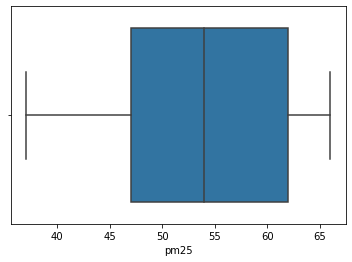

In [19]:
boxplot(dfContaminacion2018.pm25)

Insertamos un gráfico con las fechas y pm25 tan solo

/home/carlos/anaconda3/envs/ITT_BigData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


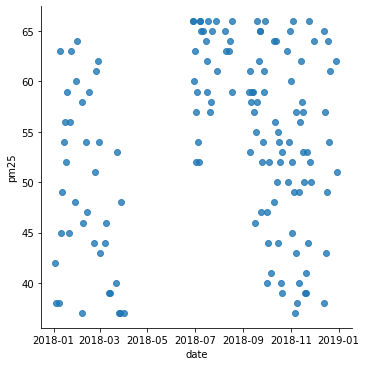

In [20]:
from seaborn import lmplot
lmplot('date', 'pm25',palette='Set1', data=dfContaminacion2018, fit_reg=False)


In [21]:
#print(dfContaminacion[(dfContaminacion['date'] > '2018-07-01') & (dfContaminacion['date'] < '2018-08-01')])


/home/carlos/anaconda3/envs/ITT_BigData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pm25', ylabel='pm10'>

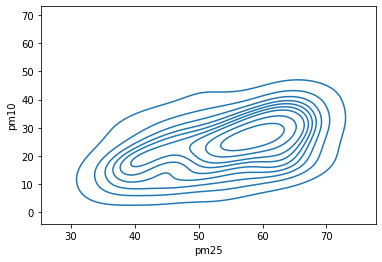

In [22]:
from seaborn import kdeplot
#dfContaminacion2018['date'].values.astype(float)
kdeplot(dfContaminacion2018.pm25, dfContaminacion2018.pm10)